#Khyati verma
Data Science Intern

Internship month: February

Task 1: Iris Flowers Classification ML Project


In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
#importing Iris DataSet
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

In [ ]:
col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']

In [ ]:
#We use Pandas library to read the csv file
dataset = pd.read_csv(url, names = col_name)

In [ ]:
#first 5 records of our dataset we get printed
dataset.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Summarize the Dataset
dataset.shape

(150, 5)

In [ ]:
#'isnull()" will returns the number of missing values in the data set
dataset.isnull().sum()

sepal-lenght    0
sepal-width     0
petal-lenght    0
petal-width     0
class           0
dtype: int64

In [ ]:
#Pandas info() method prints information about a DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame.
dataset.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#to know what are columns in dataset.
dataset.columns 

Index(['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width', 'class'], dtype='object')

In [ ]:
#number of rows that belongs to each class
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

**Data Visualization**

*Violin plot*: It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

"seaborn.violinplot" 

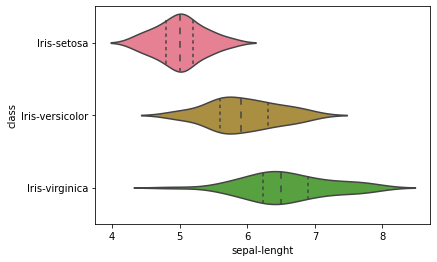

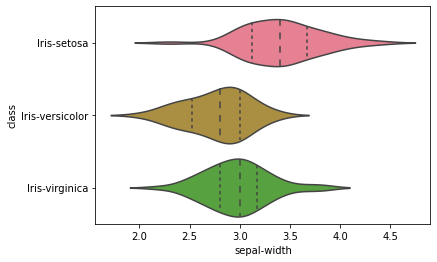

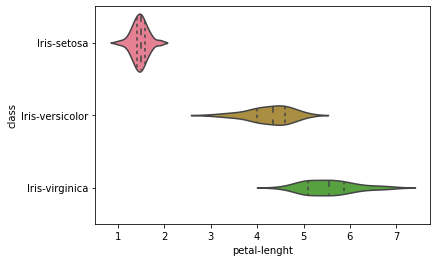

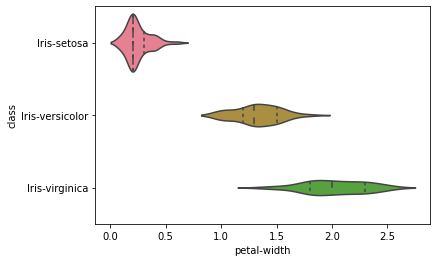

In [ ]:
#Violin plot
sns.violinplot(y='class', x='sepal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

*Pair plot*: Plot pairwise relationships in a dataset.

In [ ]:
#Pair plot
sns.pairplot(dataset, hue='class', markers='*')
plt.show()

NameError: ignored

*Heatmap*: Plotting the heatmap to check the correlation.

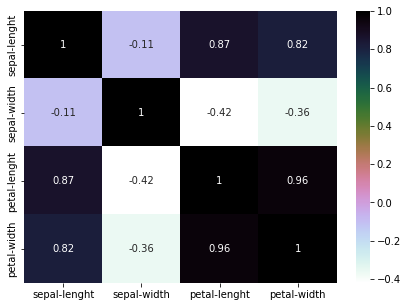

In [ ]:
#Heat Map
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

*Boxplot*: is a type of chart often used in explanatory data analysis.

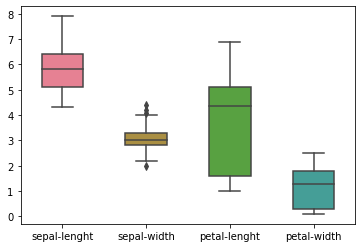

In [ ]:
#Box plot
sns.boxplot(data=dataset, width=0.5,fliersize=5)
sns.set(rc={'figure.figsize':(2,5)})

**Model Building**

1) Splitting the dataset

==>X is having all the dependent variables.

==>Y is having an independent variable.

In [ ]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


2)Train Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

3)**Model Creation - Part(1)**

A) K-nearest neighbour(KNN)

In [ ]:
#K-nearest neighbour(KNN)
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_predict_test=knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print('Accuracy: {0:.4f}'.format(accuracy_score(y_test,knn_predict_test)))

Accuracy: 0.9714


In [ ]:
print(confusion_matrix(y_test,knn_predict_test))

[[40  0  0]
 [ 0 31  2]
 [ 0  1 31]]


B) Support Vector Classification

In [ ]:
#SVC
model=SVC()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9619047619047619


C) Random Forest Classifier

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9428571428571428


D) Logistics Regression

In [ ]:
#logistics Regression
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9619047619047619


**Model Creation - Part(2):** From above algorithms, we can see that Support Vector Classifier(SVC) is performing better than other algorithms.Now, lets train SVC model on our training set and predict on test set.


In [ ]:
#To fit/train the model on X_train and Y_train use .fit() method
#To predict on X_test use .predict() method
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
#checking the accuracy of our model
accuracy_score(y_test, prediction)

0.9714285714285714

In [ ]:
#Printing out the classification report using
from sklearn.metrics import classification_report
classification_report(y_test, prediction)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        40\nIris-versicolor       1.00      0.91      0.95        33\n Iris-virginica       0.91      1.00      0.96        32\n\n       accuracy                           0.97       105\n      macro avg       0.97      0.97      0.97       105\n   weighted avg       0.97      0.97      0.97       105\n'

In [ ]:
#output
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9714285714285714
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      0.91      0.95        33
 Iris-virginica       0.91      1.00      0.96        32

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



~ Khyati verma

LGM VIRTUAL INTERNSHIP PROGRAM 2022: February 2022